# Project description
Mobile Operator Megaline was dissatisfied because most of their customers still use
the old package. The company wants to develop a model that can analyze consumer behavior and recommend one of Megaline's two new plans: Smart or Ultra.

You have access to behavioral data of customers who have switched to the latest package (from the Statistical Data Analysis course project). In this classification task, you need to develop a model that is able to choose the right package. Well, since you have completed the data pre-processing step, you can proceed directly to the model creation stage.

Develop a model with the highest level of accuracy. In this project, the threshold for accuracy is 0.75. Don't forget to check the accuracy of your model using the test dataset.

In [1]:
# Load required libraries

#data prep
import pandas as pd, numpy as np

#data viz
import matplotlib.pyplot as plt, seaborn as sns

#skylearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## Pra-process data

In [2]:
# Load data file to DataFrame
try:
    data = pd.read_csv ('/datasets/users_behavior.csv')
except:
    data = pd.read_csv ('users_behavior.csv')

<b>Deskripsi data</b>

Each observation in our dataset contains monthly behavioral information about a single user. The information includes:

<b>сalls</b> — Total Inbound Call

<b>minutes</b> — Total Duration Call (Minute)

<b>messages</b> — Total spend Messages

<b>mb_used</b> — traffic internet uses (MB-Mega Byte)

<b>is_ultimate</b> — running packages in current month (Ultimate - 1, Surf - 0)

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


<pre><b>Mini-Conclusion</b>

<b>сalls</b> — is <b>Interger</b>, Need to do something.

<b>minutes</b> — is OK

<b>messages</b> — is <b>Interger</b>, Need to do something.

<b>mb_used</b> — is OK

<b>is_ultimate</b> — is OK
</pre>

## Quality data

In [5]:
# Change data type according to requirement
data.calls = data.calls.astype(int)
data.messages = data.messages.astype(int)
data.mb_used = data.mb_used.astype(int)

In [6]:
#Checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   int64  
 4   is_ultra  3214 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 125.7 KB


In [7]:
# Checking duplicate data
data.duplicated().sum()

0

In [8]:
# Checking missing value
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

<pre><b>Mini-Conclusion</b>

Quality data is OK
</pre>

## Exploratory Data Analyst

In [9]:
# separating registered plans
data['plan'] = data['is_ultra']
data.loc[(data['is_ultra'] == 1), 'plan'] = 'ultimate'
data.loc[(data['is_ultra'] == 0), 'plan'] = 'surf'

In [10]:
# Sliced data based on the plan user used
surf_user = data.loc[data['plan'] == 'surf']
ultimate_user = data.loc[data['plan'] == 'ultimate']

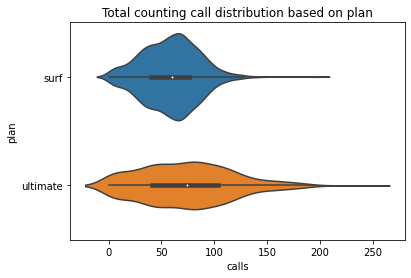

In [11]:
# Show distribution count of call usage based on plan
sns.violinplot(data=data, x='calls', y='plan')
plt.title('Total counting call distribution based on plan')
plt.show()

In [12]:
# getting Mean, variant dan standar deviation values based on plan
data.pivot_table(index='plan', values='calls', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,calls,calls,calls
plan,,,
surf,58.463437,672.876243,25.939858
ultimate,73.392893,1928.689990,43.916853


<div class="alert-info">
<b>Insight.</b>

- <b>Ultimate</b> plan have more spread of data and a higher mean value compared with <b>Surf</b> plan
</div>

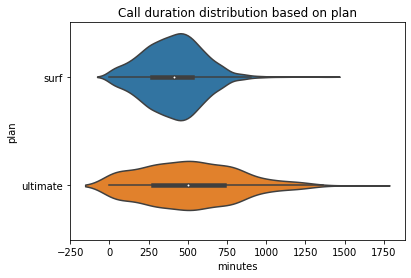

In [13]:
# Show the distribution of call duration based on plan
sns.violinplot(data=data, x='minutes', y='plan')
plt.title('Call duration distribution based on plan')
plt.show()

In [14]:
# getting Mean, variant dan standar deviation values based on plan
data.pivot_table(index='plan', values='minutes', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,minutes,minutes,minutes
plan,,,
surf,405.942952,34044.901170,184.512604
ultimate,511.224569,94883.158571,308.031100


<div class="alert-info">
<b>Insight.</b>

- <b>Ultimate</b> plan have more spread of data and a higher mean value compared with <b>Surf</b> plan
</div>

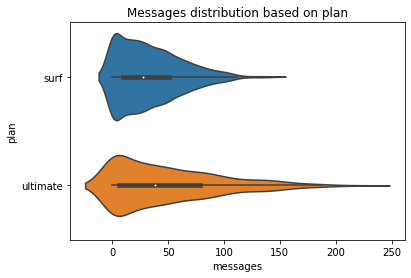

In [15]:
# Show distribution of messages based on plan
sns.violinplot(data=data, x='messages', y='plan')
plt.title('Messages distribution based on plan')
plt.show()

In [16]:
# getting Mean, variant dan standar deviation values based on plan
data.pivot_table(index='plan', values='messages', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,messages,messages,messages
plan,,,
surf,33.384029,796.812958,28.227876
ultimate,49.363452,2285.266143,47.804457


<div class="alert-info">
<b>Insight.</b>

- <b>Ultimate</b> plan have more spread of data and a higher mean value compared with <b>Surf</b> plan
</div>

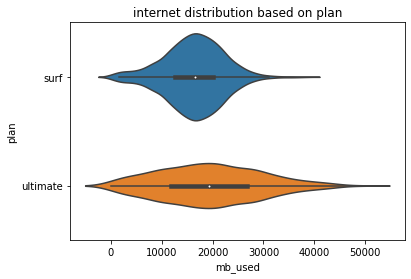

In [17]:
# Show distribution of internet uses based on plan
sns.violinplot(data=data, x='mb_used', y='plan')
plt.title('internet distribution based on plan')
plt.show()

In [18]:
# getting Mean, variant dan standar deviation values based on plan
data.pivot_table(index='plan', values='mb_used', aggfunc=[np.mean, np.var, np.std])

,mean,var,std
,mb_used,mb_used,mb_used
plan,,,
surf,16207.976223,3.446283e+07,5870.504880
ultimate,19468.344162,1.017512e+08,10087.177813


<div class="alert-info">
<b>Insight.</b>

- <b>Ultimate</b> plan have more spread of data and a higher mean value compared with <b>Surf</b> plan
    
    
    
<b>Mini-Conclusion.</b>
    
- <b>Ultimate</b> plan on any data distribution have more spread of data and a higher mean value compared with <b>Surf</b> plan
</div>

## Feature Engineering

In [19]:
# Separating target and feature (X is feature, y is target)
X =  data.drop(['is_ultra','plan'], axis=1)
y = data['is_ultra']

In [20]:
# Split data into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=25)

In [21]:
# Split test data into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=25)

In [22]:
# Checking dimension of data train 
X_train.shape

(1928, 4)

In [23]:
# Checking dimension of data validation 
X_val.shape

(643, 4)

In [24]:
# Checking dimension of data test 
X_test.shape

(643, 4)

## Model Training

### Logistic Regression

In [25]:
# Define Model
lr = LogisticRegression()
# Training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Training prediction
y_train_pred_lr = lr.predict(X_train)

# accuracy of training
accuracy_score(y_train, y_train_pred_lr)

0.7427385892116183

In [27]:
# Validate predication
y_val_pred_lr = lr.predict(X_val)

# accuracy of validation
accuracy_score(y_val, y_val_pred_lr)

0.7511664074650077

<div class="alert-info">
<b>Insight.</b>

using the Logistic regression method had an accuracy in validation predict of 75%, 
that has a 1% difference with training predict.
    
its show that model was fit in 75% accuracy.
    

</div>

### Decision Tree Model

In [28]:
# Define Model
dt = DecisionTreeClassifier()
# Training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Training prediction
y_train_pred_dt = dt.predict(X_train)

# accuracy of training
accuracy_score(y_train, y_train_pred_dt)

1.0

In [30]:
# Validate predication
y_val_pred_dt = dt.predict(X_val)

# accuracy of validation
accuracy_score(y_val, y_val_pred_dt)

0.7340590979782271

<div class="alert-info">
<b>Insight.</b>

using the Decision Tree method had an accuracy in validation predict of 73%, 
that has a 27% difference with training predict.
    
it show that model was overfit. then we must tuning the parameter in decision tree method.
    

</div>

### Hyperparameter Tuning Decision Tree

In [31]:
# Define Model
dt = DecisionTreeClassifier(random_state=100,max_depth=6, min_samples_split=5, min_samples_leaf=5)
# Training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [32]:
# Training prediction
y_train_pred_dt = dt.predict(X_train)

# accuracy of training
accuracy_score(y_train, y_train_pred_dt)

0.8298755186721992

In [33]:
# Validate predication
y_val_pred_dt = dt.predict(X_val)

# accuracy of validation
accuracy_score(y_val, y_val_pred_dt)

0.7931570762052877

<div class="alert-info">
<b>Insight.</b>

After using the hyperparameter tuning Decision Tree method had an accuracy in validation predict of 79.3%, 
that has a 3.6% difference with training predict.
    
it show that model was fit.
    

</div>

### Random Forest Model

In [34]:
# Define Model
rf = RandomForestClassifier()
# Training the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Training prediction
y_train_pred_rf = rf.predict(X_train)

# accuracy of training
accuracy_score(y_train, y_train_pred_rf)

1.0

In [36]:
# Validate predication
y_val_pred_rf = rf.predict(X_val)

# accuracy of validation
accuracy_score(y_val, y_val_pred_rf)

0.7978227060653188

<div class="alert-info">
<b>Insight.</b>

using the Random Forrest method had an accuracy in validation predict of 79%, 
that has a 21% difference with training predict.
    
it show that model was overfit. then we must tuning the parameter in random forest method.
    

</div>

### Hyperparameter Tuning Random Forest

In [37]:
# Define Model
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
# Training the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [38]:
# Training prediction
y_train_pred_rf = rf.predict(X_train)

# accuracy of training
accuracy_score(y_train, y_train_pred_rf)

0.8241701244813278

In [39]:
# Validate predication
y_val_pred_rf = rf.predict(X_val)

# accuracy of validation
accuracy_score(y_val, y_val_pred_rf)

0.7978227060653188

<div class="alert-info">
<b>Insight.</b>

After using the hyperparamater tuning Random Forrest method had an accuracy in validation predict of 79.3%, 
that has a 2.9% difference with training predict.
    
it show that model was fit.
    

</div>

<div class="alert-info">
<b>Mini-Conclusion.</b>

The best method who has big accuracy with a slight difference is using Hyperparameter tuning random Forest
    

</div>

## Predict data testing using the best model

### Hyperparameter Tuning Random Forest

In [40]:
# Prediksi di Testing
y_test_pred_rf = rf.predict(X_test)

# Cek Akurasi di Testing
accuracy_score(y_test, y_test_pred_rf)

0.8258164852255054

<div class="alert-info">
<b>Insight.</b>

After using the hyperparamater tuning Random Forrest method had an accuracy in validation predict of 79.3%, 
that has a 2.9% difference with training predict.
    
it show that model was fit.
    

</div>